In [1]:
import os
import cv2
import glob
import os, shutil
from keras import layers
from keras import models
import keras.utils as image
import matplotlib.pyplot as plt 
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img
import numpy as np
from glob import glob
import fnmatch
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras.utils as image

2023-04-27 00:15:40.491636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'pandas'

In [ ]:
#EDA

In [3]:
imagePatches = glob('/Users/matt/Desktop/archive/**/*.png', recursive=True)

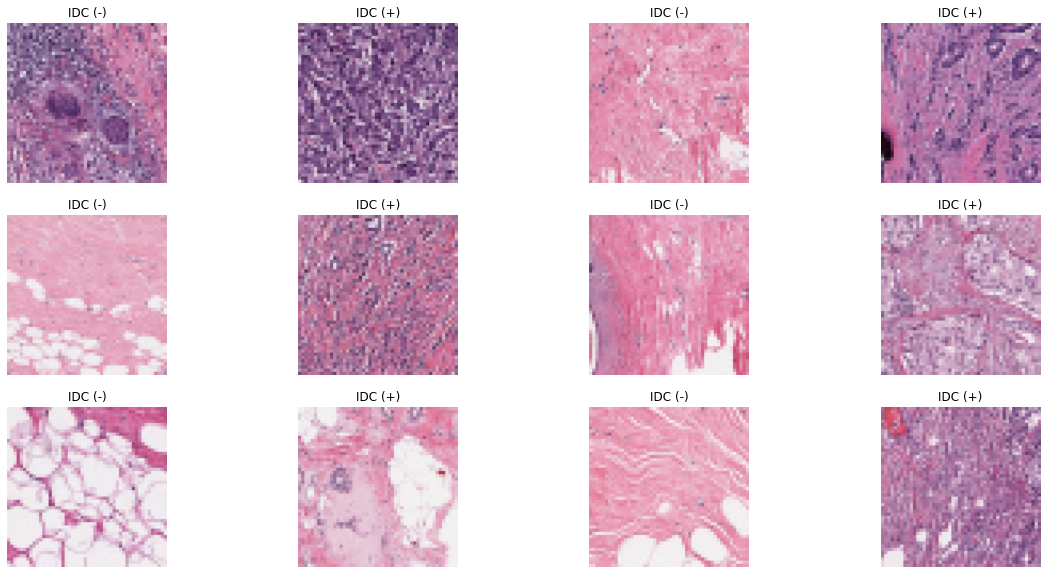

In [61]:
N_IDC = []
P_IDC = []

for img in imagePatches:
    if img[-5] == '0' :
        N_IDC.append(img)
    
    elif img[-5] == '1' :
        P_IDC.append(img)
        
plt.figure(figsize = (20, 10))

some_non = np.random.randint(0, len(N_IDC), 6)
some_can = np.random.randint(0, len(P_IDC), 6)

s = 0
for num in some_non:
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(3, 4, 2*s+1)
        plt.axis('off')
        plt.title('IDC (-)')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:
    
        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(3, 4, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

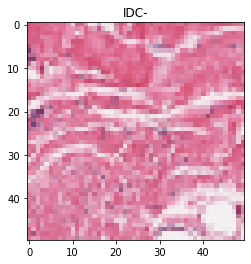

In [33]:
    # Plot each image in a loop
import matplotlib.image as mpimg

# Read the image file
img = cv2.imread('/Users/matt/Desktop/archive/8959/0/8959_idx5_x301_y1301_class0.png')

img = cv2.resize(img, (50,50))
# Plot the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Add a title
plt.title('IDC-')



# Show the plot
plt.show()



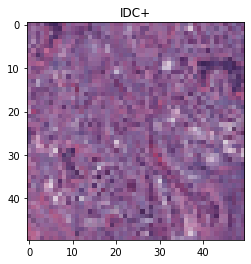

In [6]:
    # Plot each image in a loop
import matplotlib.image as mpimg

# Read the image file
img = cv2.imread('/Users/matt/Desktop/archive/8863/1/8863_idx5_x1001_y1601_class1.png')


# Plot the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Add a title
plt.title('IDC+')



# Show the plot
plt.show()

In [17]:
from os import listdir
base_path = "/Users/matt/Desktop/archive2/"
folder = listdir(base_path)
len(folder)

279

In [18]:
total_images = 0
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = base_path + patient_id 
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        total_images += len(subfiles)

In [19]:
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "target"])

k = 0
for n in range(len(folder)):
    patient_id = folder[n]
    patient_path = base_path + patient_id 
    for c in [0,1]:
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        for m in range(len(subfiles)):
            image_path = subfiles[m]
            data.iloc[k]["path"] = class_path + image_path
            data.iloc[k]["target"] = c
            data.iloc[k]["patient_id"] = patient_id
            k += 1  

data.head()

,patient_id,path,target
0,9036,/Users/matt/Desktop/archive2/9036/0/9036_idx5_...,0
1,9036,/Users/matt/Desktop/archive2/9036/0/9036_idx5_...,0
2,9036,/Users/matt/Desktop/archive2/9036/0/9036_idx5_...,0
3,9036,/Users/matt/Desktop/archive2/9036/0/9036_idx5_...,0
4,9036,/Users/matt/Desktop/archive2/9036/0/9036_idx5_...,0


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/matt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


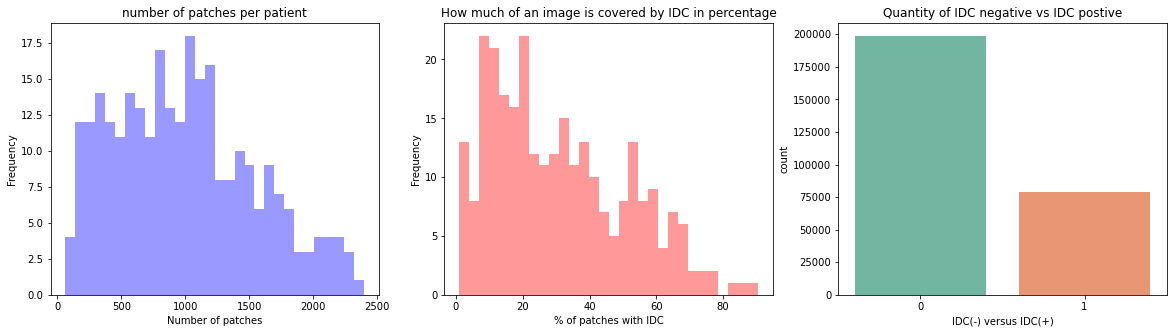

In [63]:

cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data.groupby("patient_id").size(), ax=ax[0], color="blue", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("number of patches per patient");

sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="red", kde=False, bins=30)
ax[1].set_title("How much of an image is covered by IDC in percentage")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");

sns.countplot(data.target, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("IDC(-) versus IDC(+)")
ax[2].set_title("Quantity of IDC negative vs IDC postive");


In [3]:
# Set the root directory path where your images are stored
from glob import glob
root_dir = "/Users/matt/Desktop/archive"

classZero = []
classOne = []

# Loop through all the subdirectories in the root directory
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)

    # Loop through all the image files in the subdirectory
    for file_path in glob(subdir_path + "/*/*class0.png", recursive=True):
        # Load the image using cv2 and append it to the images list
        image = cv2.imread(file_path)
        classZero.append(image)
        
        # Loop through all the image files in the subdirectory
    for file_path in glob(subdir_path + "/*/*class1.png", recursive=True):
        # Load the image using cv2 and append it to the images list
        image = cv2.imread(file_path)
        classOne.append(image)

In [4]:

len(classOne)

78786

In [5]:
len(classZero)

198738

In [6]:
    print('Total number of images: {}'.format(len(classOne+classZero)))
    print('Number of IDC(-) Images: {}'.format(len(classZero)))
    print('Number of IDC(+) Images: {}'.format(len(classOne)))
    print('Image shape (Width, Height, Channels): {}'.format(classZero[0].shape))

Total number of images: 277524
Number of IDC(-) Images: 198738
Number of IDC(+) Images: 78786
Image shape (Width, Height, Channels): (50, 50, 3)


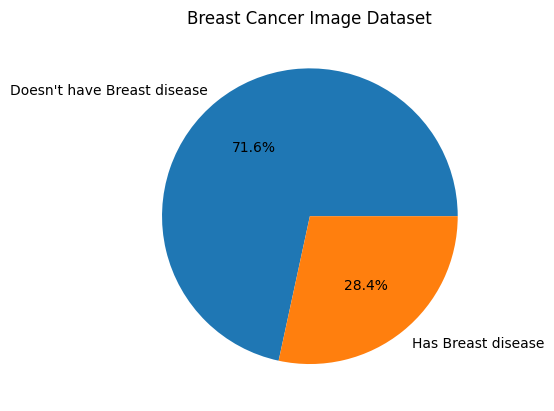

In [7]:
counts = [len(classZero), len(classOne)]
labels = ['Doesn\'t have Breast disease', 'Has Breast disease']

plt.pie(counts, labels=labels, autopct='%1.1f%%')
# plt.xlabel('Class')
# plt.ylabel('Count')
plt.title('Breast Cancer Image Dataset')
plt.show()

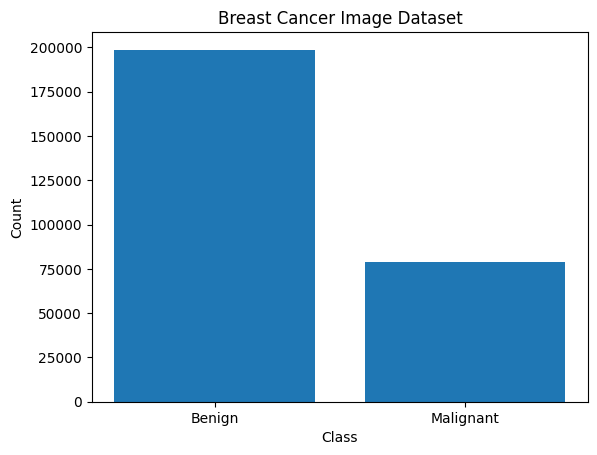

In [8]:
counts = [len(classZero), len(classOne)]
labels = ['Benign', 'Malignant']

plt.bar(labels, counts)
plt.title('Breast Cancer Image Dataset')
plt.xlabel('Class')
plt.ylabel('Count')



plt.show()


In [9]:
classZero = classZero[0:78000]
classOne = classOne[0:78000]

In [10]:
len(classZero)

78000

In [11]:
len(classOne)

78000

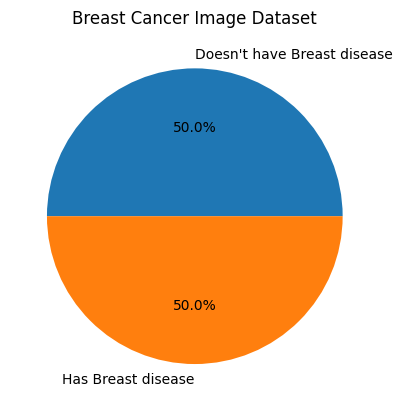

In [12]:
counts = [len(classZero), len(classOne)]
labels = ['Doesn\'t have Breast disease', 'Has Breast disease']

plt.pie(counts, labels=labels, autopct='%1.1f%%')
# plt.xlabel('Class')
# plt.ylabel('Count')
plt.title('Breast Cancer Image Dataset')
plt.show()

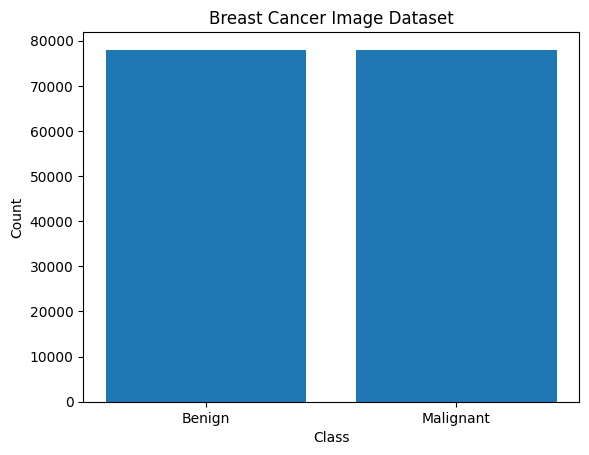

In [17]:
counts = [len(classZero), len(classOne)]
labels = ['Benign', 'Malignant']

plt.bar(labels, counts)
plt.title('Breast Cancer Image Dataset')
plt.xlabel('Class')
plt.ylabel('Count')



plt.show()

In [18]:
save_dir = "/Users/matt/Desktop/Output/Zero"

os.makedirs(save_dir, exist_ok=True)

for i, image in enumerate(classZero):
    cv2.imwrite(os.path.join(save_dir, f"image_{i}_class0.png"), image)

In [19]:
save_dir = "/Users/matt/Desktop/Output/One"

os.makedirs(save_dir, exist_ok=True)

for i, image in enumerate(classOne):
    cv2.imwrite(os.path.join(save_dir, f"image_{i}_class1.png"), image)

In [20]:
original_dataset_dir = '/Users/matt/Desktop/Output'    

base_dir = '/Users/matt/Desktop/CNNData'                 
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')                                
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')                      
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')                                  
os.mkdir(test_dir)

train_zero_dir = os.path.join(train_dir, 'Zero')                           
os.mkdir(train_zero_dir)                                                   

train_one_dir = os.path.join(train_dir, 'One')                           
os.mkdir(train_one_dir)                                                   

validation_zero_dir = os.path.join(validation_dir, 'Zero')                 
os.mkdir(validation_zero_dir)                                              

validation_one_dir = os.path.join(validation_dir, 'One')                 
os.mkdir(validation_one_dir)                                              

test_zero_dir = os.path.join(test_dir, 'Zero')                             
os.mkdir(test_zero_dir)                                                    

test_one_dir = os.path.join(test_dir, 'One')                             
os.mkdir(test_one_dir)  

In [21]:
classZero_data_dir = '/Users/matt/Desktop/Output/Zero' 
classOne_data_dir = '/Users/matt/Desktop/Output/One' 

fnames = ['image_{}_class0.png'.format(i) for i in range(46800)]                     
for fname in fnames:                                                       
    src = os.path.join(classZero_data_dir, fname)                        
    dst = os.path.join(train_zero_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['image_{}_class0.png'.format(i) for i in range(46800, 62400)]               
for fname in fnames:                                                       
    src = os.path.join(classZero_data_dir, fname)                        
    dst = os.path.join(validation_zero_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['image_{}_class0.png'.format(i) for i in range(62400, 78000)]               
for fname in fnames:                                                       
    src = os.path.join(classZero_data_dir, fname)                        
    dst = os.path.join(test_zero_dir, fname)                               
    shutil.copyfile(src, dst)                                              

fnames = ['image_{}_class1.png'.format(i) for i in range(46800)]                     
for fname in fnames:                                                       
    src = os.path.join(classOne_data_dir, fname)                        
    dst = os.path.join(train_one_dir, fname)                              
    shutil.copyfile(src, dst)                                             
fnames = ['image_{}_class1.png'.format(i) for i in range(46800, 62400)]               
for fname in fnames:                                                       
    src = os.path.join(classOne_data_dir, fname)                       
    dst = os.path.join(validation_one_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['image_{}_class1.png'.format(i) for i in range(62400, 78000)]               
for fname in fnames:                                                       
    src = os.path.join(classOne_data_dir, fname)                        
    dst = os.path.join(test_one_dir, fname)                               
    shutil.copyfile(src, dst) 

In [22]:
print('total training zero images:', len(os.listdir(train_zero_dir)))
print('total training one images:', len(os.listdir(train_one_dir)))

print('total validation zero images:', len(os.listdir(validation_zero_dir)))

print('total validation one images:', len(os.listdir(validation_one_dir)))


print('total test zero images:', len(os.listdir(test_zero_dir)))
print('total test one images:', len(os.listdir(test_one_dir)))

total training zero images: 46800
total training one images: 46800
total validation zero images: 15600
total validation one images: 15600
total test zero images: 15600
total test one images: 15600


In [23]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

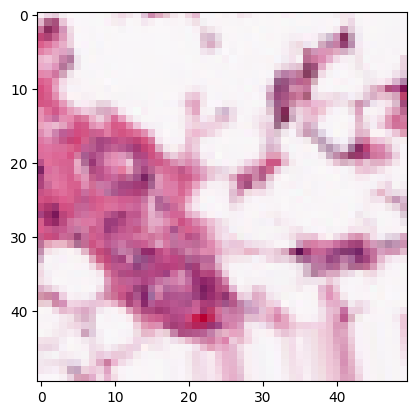

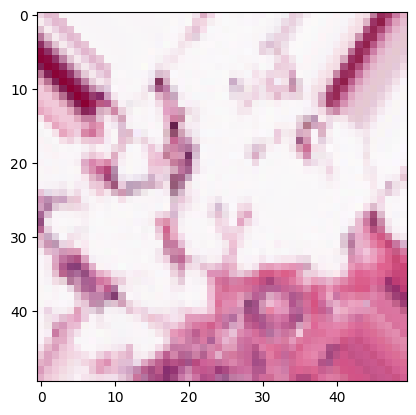

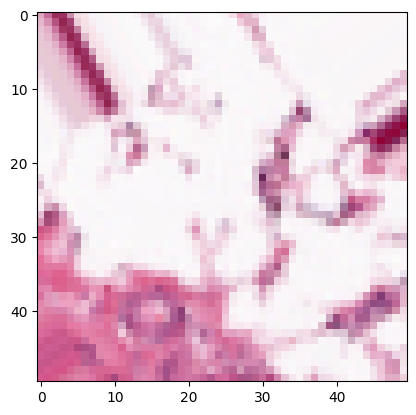

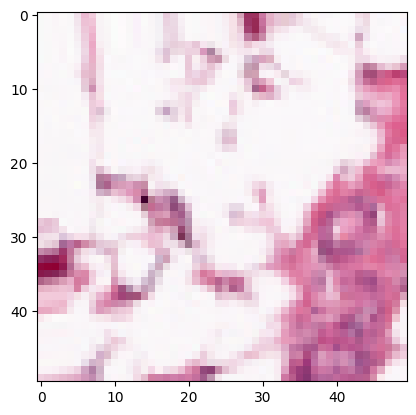

In [36]:
from keras.preprocessing import image    
import keras.utils as image

fnames = [os.path.join(train_zero_dir, fname) for
     fname in os.listdir(train_zero_dir)]

img_path = fnames[3]                                            

img = image.load_img(img_path)          

x = image.img_to_array(img)                                     
x = x.reshape((1,) + x.shape)                                   

i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()